
# Beer Review Data Exploration - Part 1

February 2016 by Luke Woods


*This dataset consists of 1.5 million beer reviews from BeerAdvocate.com (available on [Amazon S3 demo-datasets](https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz).)*


<img style="float: right;" src=http://i.imgur.com/k4lvXN4.png?1>

___


The following questions are explored and expanded upon, taken from the blog post at [TCB Analytics](http://tcbanalytics.com/blog/testing-data-skills.html#.VvyGGxJ96Rt).

>1. Which brewery produces the strongest beers by ABV%?
>2. If you had to pick 3 beers to recommend using only this data, which would you pick?
>3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
>4. Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

___

First, importing libraries and dataset into pandas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('beer_reviews.csv')
df.shape

(1586614, 13)

In [3]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

### 1. Which brewery produces the strongest beers by ABV%?
First, trimming the dataframe down to the relevant columns.

In [4]:
brewery_df = df[['brewery_name', 'beer_name', 'beer_abv']]
brewery_df.head()

,brewery_name,beer_name,beer_abv
0,Vecchio Birraio,Sausa Weizen,5.0
1,Vecchio Birraio,Red Moon,6.2
2,Vecchio Birraio,Black Horse Black Beer,6.5
3,Vecchio Birraio,Sausa Pils,5.0
4,Caldera Brewing Company,Cauldron DIPA,7.7


Grouping the reviews by brewery, then beer, gives a list of each brewery's beer collection. The [ size ] column shows how many reviews are logged for each beer.

In [5]:
abv_df = brewery_df.groupby(('brewery_name', 'beer_name')).agg({'beer_abv': [np.size, np.mean]})
abv_df.head(10)

beer_abv      
                                                       size  mean
brewery_name          beer_name                                  
't Hofbrouwerijke     Blondelle                           1   8.0
                      Bosprotter                          9   8.5
                      Hof Korvatunturi                    2  11.0
                      Hofblues                           16   5.5
                      Hofdraak                            7   6.5
                      Hofnar                              1   5.0
                      Hoftrol                             1   6.2
(512) Brewing Company (512) Alt                          11   6.0
                      (512) Black IPA                    13   7.0
                      (512) Brandy Barrel Aged ONE        8   8.0

In [6]:
# Calculating the overall ABV mean for each brewery
meanABV_df = abv_df.groupby(level='brewery_name').mean()
meanABV_df.head(4)

beer_abv          
                            size      mean
brewery_name                              
't Hofbrouwerijke       5.285714  7.242857
(512) Brewing Company  21.714286  7.238462
10 Barrel Brewing Co.   4.941176  6.109091
1516 Brewing Company    1.888889  5.650000

In [7]:
# Cleaning columns labels
meanABV_df.columns = ('mean_Ratings', 'mean_ABV')

By sorting the dataframe, the top breweries by average ABV are revealed.

In [8]:
sorted_df = meanABV_df.drop('mean_Ratings', 1).sort_values('mean_ABV', ascending=False).reset_index()
sorted_df.head(8)

,brewery_name,mean_ABV
0,Schorschbräu,24.690000
1,Shoes Brewery,15.200000
2,Rome Brewing Company,14.200000
3,Hurlimann Brewery,13.500000
4,Alt-Oberurseler Brauhaus,13.200000
5,Rascal Creek Brewing Co.,13.000000
6,Monks Porter House,12.466667
7,United Brands Company,12.000000


Visulising the data shows that most breweries brew around 5% ABV, much less than the 25% of Schorschbräu. The blue vertical line represents this maximum value.

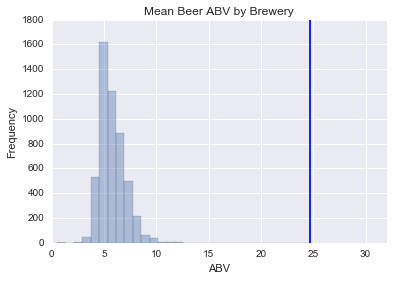

In [52]:
# Seaborn plotting
x = meanABV_df['mean_ABV'].dropna()
sns.distplot(x, bins=30, kde=False);

# Matplotlib graph formatting
plt.title('Mean Beer ABV by Brewery')
plt.axis([0, 32, 0, 1800])
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.axvline(x=24.69)
plt.show()